# Advanced methods in classification

In [ ]:
import os
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB

import seaborn as sns
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset, TensorDataset
from torch.utils.data.dataset import random_split

import shutil
from PIL import Image
from torchvision import transforms

## Loading Data

In [ ]:
!wget https://prod-dcd-datasets-cache-zipfiles.s3.eu-west-1.amazonaws.com/zkwgkjkjn9-2.zip

--2024-01-24 10:33:00--  https://prod-dcd-datasets-cache-zipfiles.s3.eu-west-1.amazonaws.com/zkwgkjkjn9-2.zip
Resolving prod-dcd-datasets-cache-zipfiles.s3.eu-west-1.amazonaws.com (prod-dcd-datasets-cache-zipfiles.s3.eu-west-1.amazonaws.com)... 52.92.36.34, 3.5.64.127, 52.218.106.24, ...
Connecting to prod-dcd-datasets-cache-zipfiles.s3.eu-west-1.amazonaws.com (prod-dcd-datasets-cache-zipfiles.s3.eu-west-1.amazonaws.com)|52.92.36.34|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2838895384 (2.6G) [application/zip]
Saving to: ‘zkwgkjkjn9-2.zip’

zkwgkjkjn9-2.zip    100%[===================>]   2.64G  29.7MB/s    in 84s     

2024-01-24 10:34:25 (32.2 MB/s) - ‘zkwgkjkjn9-2.zip’ saved [2838895384/2838895384]



In [ ]:
!unzip zkwgkjkjn9-2.zip

Archive:  zkwgkjkjn9-2.zip
  inflating: zkwgkjkjn9-2/Gas Sensors Measurements/Gas_Sensors_Measurements.csv  
  inflating: zkwgkjkjn9-2/Thermal Camera Images/Mixture.zip  
  inflating: zkwgkjkjn9-2/Thermal Camera Images/NoGas.zip  
  inflating: zkwgkjkjn9-2/Thermal Camera Images/Perfume.zip  
  inflating: zkwgkjkjn9-2/Thermal Camera Images/Smoke.zip  
  inflating: zkwgkjkjn9-2/Thermal Camera Images/Sample Thermal Camera Images/Mixture/10_Mixture.png  
  inflating: zkwgkjkjn9-2/Thermal Camera Images/Sample Thermal Camera Images/Mixture/18_Mixture.png  
  inflating: zkwgkjkjn9-2/Thermal Camera Images/Sample Thermal Camera Images/Mixture/11_Mixture.png  
  inflating: zkwgkjkjn9-2/Thermal Camera Images/Sample Thermal Camera Images/Mixture/13_Mixture.png  
  inflating: zkwgkjkjn9-2/Thermal Camera Images/Sample Thermal Camera Images/Mixture/14_Mixture.png  
  inflating: zkwgkjkjn9-2/Thermal Camera Images/Sample Thermal Camera Images/Mixture/16_Mixture.png  
  inflating: zkwgkjkjn9-2/Thermal C

In [ ]:
!mkdir ImagesFolder

In [ ]:
!unzip /content/zkwgkjkjn9-2/Thermal\ Camera\ Images/Mixture.zip -d /content/ImagesFolder

Archive:  /content/zkwgkjkjn9-2/Thermal Camera Images/Mixture.zip
 extracting: /content/ImagesFolder/0_Mixture.png  
 extracting: /content/ImagesFolder/1000_Mixture.png  
 extracting: /content/ImagesFolder/1001_Mixture.png  
 extracting: /content/ImagesFolder/1002_Mixture.png  
 extracting: /content/ImagesFolder/1003_Mixture.png  
 extracting: /content/ImagesFolder/1004_Mixture.png  
 extracting: /content/ImagesFolder/1005_Mixture.png  
 extracting: /content/ImagesFolder/1006_Mixture.png  
 extracting: /content/ImagesFolder/1007_Mixture.png  
 extracting: /content/ImagesFolder/1008_Mixture.png  
 extracting: /content/ImagesFolder/1009_Mixture.png  
 extracting: /content/ImagesFolder/100_Mixture.png  
 extracting: /content/ImagesFolder/1010_Mixture.png  
 extracting: /content/ImagesFolder/1011_Mixture.png  
 extracting: /content/ImagesFolder/1012_Mixture.png  
 extracting: /content/ImagesFolder/1013_Mixture.png  
 extracting: /content/ImagesFolder/1014_Mixture.png  
 extracting: /conten

In [ ]:
!unzip /content/zkwgkjkjn9-2/Thermal\ Camera\ Images/Perfume.zip -d /content/ImagesFolder

Archive:  /content/zkwgkjkjn9-2/Thermal Camera Images/Perfume.zip
 extracting: /content/ImagesFolder/0_Perfume.png  
 extracting: /content/ImagesFolder/1000_Perfume.png  
 extracting: /content/ImagesFolder/1001_Perfume.png  
 extracting: /content/ImagesFolder/1002_Perfume.png  
 extracting: /content/ImagesFolder/1003_Perfume.png  
 extracting: /content/ImagesFolder/1004_Perfume.png  
 extracting: /content/ImagesFolder/1005_Perfume.png  
 extracting: /content/ImagesFolder/1006_Perfume.png  
 extracting: /content/ImagesFolder/1007_Perfume.png  
 extracting: /content/ImagesFolder/1008_Perfume.png  
 extracting: /content/ImagesFolder/1009_Perfume.png  
 extracting: /content/ImagesFolder/100_Perfume.png  
 extracting: /content/ImagesFolder/1010_Perfume.png  
 extracting: /content/ImagesFolder/1011_Perfume.png  
 extracting: /content/ImagesFolder/1012_Perfume.png  
 extracting: /content/ImagesFolder/1013_Perfume.png  
 extracting: /content/ImagesFolder/1014_Perfume.png  
 extracting: /conten

In [ ]:
!ls -l "/content/ImagesFolder" | grep -c '\.png$'

1600


## Importing Dataset

In [ ]:
df = pd.read_csv("/content/zkwgkjkjn9-2/Gas Sensors Measurements/Gas_Sensors_Measurements.csv")
df

,Serial Number,MQ2,MQ3,MQ5,MQ6,MQ7,MQ8,MQ135,Gas,Corresponding Image Name
0,0,555,515,377,338,666,451,416,NoGas,0_NoGas
1,1,555,516,377,339,666,451,416,NoGas,1_NoGas
2,2,556,517,376,337,666,451,416,NoGas,2_NoGas
3,3,556,516,376,336,665,451,416,NoGas,3_NoGas
4,4,556,516,376,337,665,451,416,NoGas,4_NoGas
...,...,...,...,...,...,...,...,...,...,...
6395,1595,658,445,455,414,491,321,436,Mixture,1595_Mixture
6396,1596,650,444,451,411,486,317,431,Mixture,1596_Mixture
6397,1597,630,443,446,407,474,312,429,Mixture,1597_Mixture
6398,1598,632,443,444,405,471,309,430,Mixture,1598_Mixture


## EDA:

In [ ]:
# Check for missing values
df.isnull().sum()

Serial Number               0
MQ2                         0
MQ3                         0
MQ5                         0
MQ6                         0
MQ7                         0
MQ8                         0
MQ135                       0
Gas                         0
Corresponding Image Name    0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6400 entries, 0 to 6399
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Serial Number             6400 non-null   int64 
 1   MQ2                       6400 non-null   int64 
 2   MQ3                       6400 non-null   int64 
 3   MQ5                       6400 non-null   int64 
 4   MQ6                       6400 non-null   int64 
 5   MQ7                       6400 non-null   int64 
 6   MQ8                       6400 non-null   int64 
 7   MQ135                     6400 non-null   int64 
 8   Gas                       6400 non-null   object
 9   Corresponding Image Name  6400 non-null   object
dtypes: int64(8), object(2)
memory usage: 500.1+ KB


In [ ]:
df.shape

(6400, 10)

In [ ]:
if df.duplicated().any():
    print(df.duplicated().sum(),"has duplicate data.")
else:
    print("no duplicate.")

no duplicate.


In [ ]:
df = df.drop('Serial Number', axis=1)
df

,MQ2,MQ3,MQ5,MQ6,MQ7,MQ8,MQ135,Gas,Corresponding Image Name
0,555,515,377,338,666,451,416,NoGas,0_NoGas
1,555,516,377,339,666,451,416,NoGas,1_NoGas
2,556,517,376,337,666,451,416,NoGas,2_NoGas
3,556,516,376,336,665,451,416,NoGas,3_NoGas
4,556,516,376,337,665,451,416,NoGas,4_NoGas
...,...,...,...,...,...,...,...,...,...
6395,658,445,455,414,491,321,436,Mixture,1595_Mixture
6396,650,444,451,411,486,317,431,Mixture,1596_Mixture
6397,630,443,446,407,474,312,429,Mixture,1597_Mixture
6398,632,443,444,405,471,309,430,Mixture,1598_Mixture


In [ ]:
#Label Encoding
encoding_mapping = {'NoGas': 0, 'Perfume':1, 'Smoke':2, 'Mixture': 3}
df['Gas'] = df['Gas'].replace(encoding_mapping)
df

,MQ2,MQ3,MQ5,MQ6,MQ7,MQ8,MQ135,Gas,Corresponding Image Name
0,555,515,377,338,666,451,416,0,0_NoGas
1,555,516,377,339,666,451,416,0,1_NoGas
2,556,517,376,337,666,451,416,0,2_NoGas
3,556,516,376,336,665,451,416,0,3_NoGas
4,556,516,376,337,665,451,416,0,4_NoGas
...,...,...,...,...,...,...,...,...,...
6395,658,445,455,414,491,321,436,3,1595_Mixture
6396,650,444,451,411,486,317,431,3,1596_Mixture
6397,630,443,446,407,474,312,429,3,1597_Mixture
6398,632,443,444,405,471,309,430,3,1598_Mixture


In [ ]:
df = df.drop('Corresponding Image Name', axis=1)
df

,MQ2,MQ3,MQ5,MQ6,MQ7,MQ8,MQ135,Gas
0,555,515,377,338,666,451,416,0
1,555,516,377,339,666,451,416,0
2,556,517,376,337,666,451,416,0
3,556,516,376,336,665,451,416,0
4,556,516,376,337,665,451,416,0
...,...,...,...,...,...,...,...,...
6395,658,445,455,414,491,321,436,3
6396,650,444,451,411,486,317,431,3
6397,630,443,446,407,474,312,429,3
6398,632,443,444,405,471,309,430,3


## Preprocessing:

Split the dataset into features and target variable

In [ ]:
X = df.drop('Gas', axis=1)
y = df['Gas']


Split the dataset into training and testing sets

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Standardize the features

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


### Train and evaluate classifiers

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.inspection import permutation_importance

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=sorted(df['Gas'].unique()), yticklabels=sorted(df['Gas'].unique()))
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

**Random Forest**

In [ ]:
rf_params = {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20, 30]}
rf_classifier = RandomForestClassifier(random_state=42)

grid_search_rf = GridSearchCV(rf_classifier, rf_params, cv=5)
grid_search_rf.fit(X_train_scaled, y_train)

# Evaluate the classifier
rf_predictions = grid_search_rf.predict(X_test_scaled)
print("Random Forest Classification Report:")
print(classification_report(y_test, rf_predictions))
print("Random Forest Accuracy:", accuracy_score(y_test, rf_predictions))

# Analyze sensitivity
rf_importance = permutation_importance(grid_search_rf, X_test_scaled, y_test)
print("Random Forest Feature Importances:")
print(rf_importance.importances_mean)


Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.95      0.96       347
           1       0.94      0.97      0.96       320
           2       1.00      1.00      1.00       309
           3       1.00      1.00      1.00       304

    accuracy                           0.98      1280
   macro avg       0.98      0.98      0.98      1280
weighted avg       0.98      0.98      0.98      1280

Random Forest Accuracy: 0.97734375
Random Forest Feature Importances:
[0.040625   0.271875   0.01703125 0.074375   0.05546875 0.1478125
 0.0696875 ]


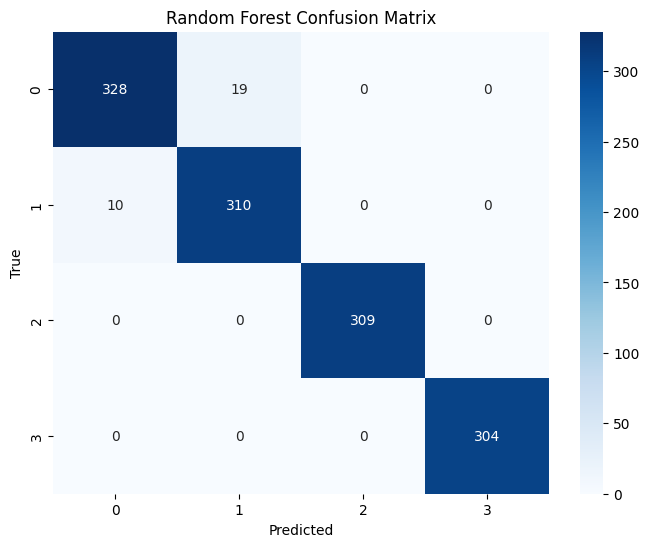

In [27]:
# Plot confusion matrix for Random Forest
plot_confusion_matrix(y_test, rf_predictions, title='Random Forest Confusion Matrix')


Sensitivity Analysis of Hyperparameters

Random Forest Feature Importances:
[0.0384375  0.27453125 0.015625   0.0725     0.05734375 0.1453125
 0.063125  ]


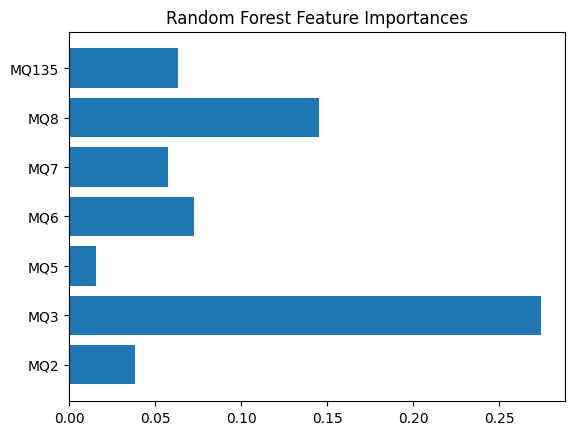

In [32]:
# Analyze sensitivity for Random Forest
rf_importance = permutation_importance(grid_search_rf, X_test_scaled, y_test)
print("Random Forest Feature Importances:")
print(rf_importance.importances_mean)

# Visualize feature importances
plt.barh(X.columns, rf_importance.importances_mean)
plt.title('Random Forest Feature Importances')
plt.show()

**Support Vector Machine (SVM)**

In [ ]:
svm_params = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf', 'poly']}
svm_classifier = SVC(random_state=42)

grid_search_svm = GridSearchCV(svm_classifier, svm_params, cv=5)
grid_search_svm.fit(X_train_scaled, y_train)

# Evaluate the classifier
svm_predictions = grid_search_svm.predict(X_test_scaled)
print("SVM Classification Report:")
print(classification_report(y_test, svm_predictions))
print("SVM Accuracy:", accuracy_score(y_test, svm_predictions))


SVM Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.85      0.89       347
           1       0.85      0.93      0.89       320
           2       1.00      1.00      1.00       309
           3       1.00      1.00      1.00       304

    accuracy                           0.94      1280
   macro avg       0.94      0.94      0.94      1280
weighted avg       0.94      0.94      0.94      1280

SVM Accuracy: 0.94140625


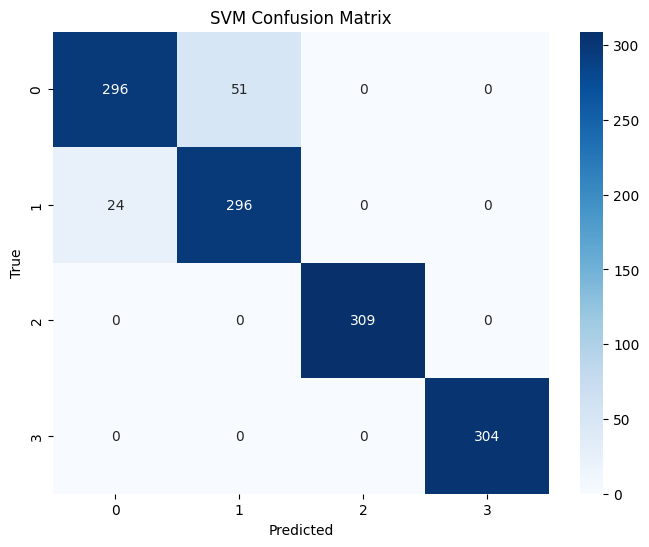

In [28]:
# Plot confusion matrix for SVM
plot_confusion_matrix(y_test, svm_predictions, title='SVM Confusion Matrix')


Sensitivity Analysis of Hyperparameters

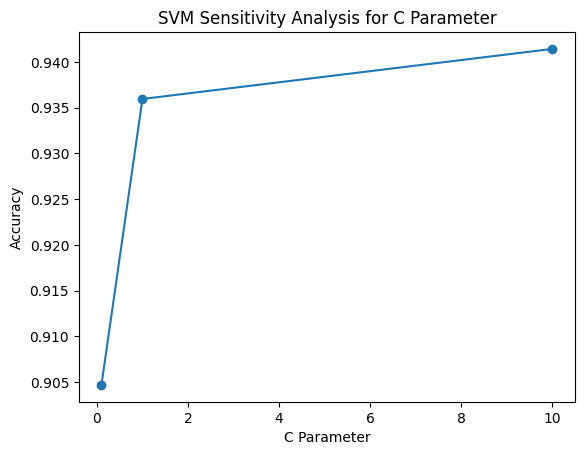

In [33]:
# SVM sensitivity analysis is often less straightforward, but you can check the impact of C parameter
svm_c_values = [0.1, 1, 10]
svm_sensitivity_scores = []

for c in svm_c_values:
    svm_classifier = SVC(C=c, kernel=grid_search_svm.best_params_['kernel'], random_state=42)
    svm_classifier.fit(X_train_scaled, y_train)
    svm_predictions = svm_classifier.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, svm_predictions)
    svm_sensitivity_scores.append(accuracy)

# Visualize sensitivity to C parameter
plt.plot(svm_c_values, svm_sensitivity_scores, marker='o')
plt.title('SVM Sensitivity Analysis for C Parameter')
plt.xlabel('C Parameter')
plt.ylabel('Accuracy')
plt.show()

**Multi-Modal Classification (Voting Classifier)**

In [ ]:
from sklearn.ensemble import VotingClassifier

# Create a voting classifier
voting_classifier = VotingClassifier(estimators=[
    ('rf', grid_search_rf.best_estimator_),
    ('svm', grid_search_svm.best_estimator_)
], voting='hard')

voting_classifier.fit(X_train_scaled, y_train)

# Evaluate the voting classifier
voting_predictions = voting_classifier.predict(X_test_scaled)
print("Voting Classifier Classification Report:")
print(classification_report(y_test, voting_predictions))
print("Voting Classifier Accuracy:", accuracy_score(y_test, voting_predictions))


Voting Classifier Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.95      0.94       347
           1       0.95      0.92      0.93       320
           2       1.00      1.00      1.00       309
           3       1.00      1.00      1.00       304

    accuracy                           0.97      1280
   macro avg       0.97      0.97      0.97      1280
weighted avg       0.97      0.97      0.97      1280

Voting Classifier Accuracy: 0.96640625


In [34]:
from itertools import combinations

# Define the base classifiers
base_classifiers = [('rf', grid_search_rf.best_estimator_), ('svm', grid_search_svm.best_estimator_)]

# Evaluate the Voting Classifier with different combinations of base classifiers
for subset in range(1, len(base_classifiers) + 1):
    for subset_combination in combinations(base_classifiers, subset):
        subset_classifiers = list(subset_combination)

        # Create a voting classifier with the current subset
        voting_classifier_subset = VotingClassifier(estimators=subset_classifiers, voting='hard')
        voting_classifier_subset.fit(X_train_scaled, y_train)

        # Evaluate the subset voting classifier
        subset_predictions = voting_classifier_subset.predict(X_test_scaled)

        # Print results
        subset_names = [name for name, _ in subset_classifiers]
        print(f"Voting Classifier Subset ({', '.join(subset_names)}) Classification Report:")
        print(classification_report(y_test, subset_predictions))
        print(f"Subset Accuracy ({', '.join(subset_names)}):", accuracy_score(y_test, subset_predictions))
        print()


Voting Classifier Subset (rf) Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.95      0.96       347
           1       0.94      0.97      0.96       320
           2       1.00      1.00      1.00       309
           3       1.00      1.00      1.00       304

    accuracy                           0.98      1280
   macro avg       0.98      0.98      0.98      1280
weighted avg       0.98      0.98      0.98      1280

Subset Accuracy (rf): 0.97734375

Voting Classifier Subset (svm) Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.85      0.89       347
           1       0.85      0.93      0.89       320
           2       1.00      1.00      1.00       309
           3       1.00      1.00      1.00       304

    accuracy                           0.94      1280
   macro avg       0.94      0.94      0.94      1280
weighted avg       0.94      0.94      0.94 

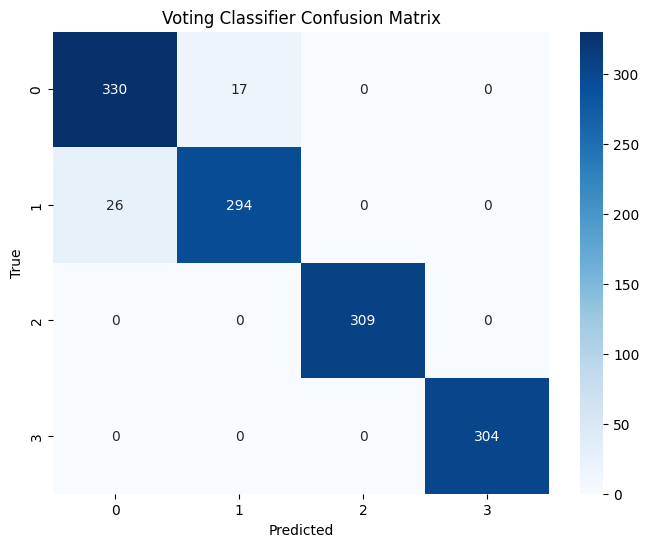

In [29]:
# Plot confusion matrix for Voting Classifier
plot_confusion_matrix(y_test, voting_predictions, title='Voting Classifier Confusion Matrix')